# Would a Jupyter Notebook serve as an UI to `fb_scraper`?

Some sketching and feasibility study for a Jupyter Notebook as an UI to [facebook-scraper](https://github.com/bacilo/facebook-scraper/tree/incorporate), and particularly it's `incorporate` branch.

In [1]:
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The scraper has a dash (`-`) in the directory name of the version control repository, so it can be imported little peculiarly as `fb_scraper = __import__("facebook-scraper")`. But let's add it's directory to the path, and solve this later by arranding things.

In [2]:
import sys

In [3]:
sys.path.append("../facebook-scraper")

In [4]:
import fb_scraper
import fb_scraper.prodcons
import fb_scraper.job

Scraper setup. The config file looks like

    [creds]
    access_token = asdjasldjkasldkjasdkjwithoutquotes

In [9]:
config = configparser.ConfigParser()
config.read("config.ini")
creds = config["creds"]

In [12]:
mgr = fb_scraper.prodcons.Manager(dict(creds))

Scraping job setup

In [14]:
ethospagejob = fb_scraper.job.PageJob(node_id="822254694506527")

In [15]:
mgr.add_job(ethospagejob)

![Make it so](http://laughshop.com/wp-content/uploads/2017/06/Make-It-So.png)

The user must wait here.

In [16]:
mgr.start()

(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 0 responses,1 requests,
(Thread-9  - run): About to send 1 requests
(Thread-9  - run): queued 1 responses received
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 0 responses,1 requests,1 responses_queued,
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 1 responses,6 requests,1 responses_queued,521 reactions,97 attachments,100 posts,48 comm,4 sharedposts,
(Thread-8  - run): About to send 5 requests
(Thread-8  - run): queued 3 responses received
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 2 responses,11 requests,4 responses_queued,1408 reactions,194 attachments,200 posts,101 comm,10 sharedposts,
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527, total: 3 responses,11 requests,4 responses_queued,1408 reactions,194 attachments,200 posts,101 comm,10 sharedposts,
(Thread-4  - check_jobs_statuses): Job page_feed_822254694506527

Thanks Sebastian for point out to me that the results go up a directory level, outside of `facebook-scraper` or wherever one happens to be.

Proper way would be actually get this from the manager, by having the manager to retain completed jobs filenames from `Job.writers[].path` and `Job.writers[].file_name`. Anyway just some hand-holding here for the file reading operation:

In [20]:
posts = pd.read_csv("output/2017-10-17_12_12_09_472534_page_feed_822254694506527/2017-10-17_12_12_09_472534_page_feed_822254694506527_posts.csv",
                    parse_dates=['created_time', 'updated_time'], skipfooter=1, engine="python")

In [21]:
posts.shape

(357, 18)

In [261]:
posts.columns

Index(['id', 'story', 'created_time', 'message', 'picture', 'caption',
       'description', 'from_id', 'from_name', 'name', 'object_id', 'parent_id',
       'source', 'status_type', 'link', 'type', 'updated_time',
       'shares_count'],
      dtype='object')

In [22]:
posts.dtypes

id                      object
story                   object
created_time    datetime64[ns]
message                 object
picture                 object
caption                 object
description             object
from_id                  int64
from_name               object
name                    object
object_id               object
parent_id               object
source                  object
status_type             object
link                    object
type                    object
updated_time    datetime64[ns]
shares_count             int64
dtype: object

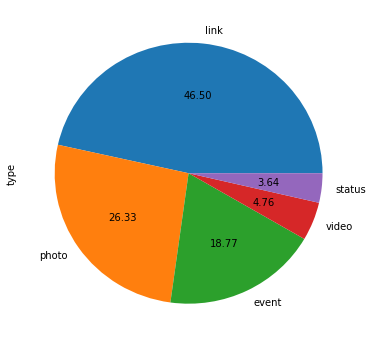

In [23]:
posts.type.value_counts().plot.pie(autopct='%.2f', figsize=(6, 6))